# Fourier Transforms

In [31]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import math

## Part 1: The Discrete Fourier Transform

We’re about to make the transition from Fourier series to the Fourier transform. “Transition” is the
appropriate word, for in the approach we’ll take the Fourier transform emerges as we pass from periodic
to nonperiodic functions. To make the trip we’ll view a nonperiodic function (which can be just about
anything) as a limiting case of a periodic function as the period becomes longer and longer.

We're going to start by creating a pulse function. Let's start with the following pulse function:

In [32]:
def pulseFunction(x):
    return 1/(3 + (x-20)**2)

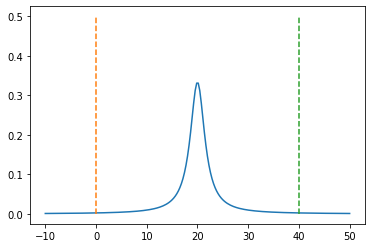

In [33]:
x = np.linspace(-10, 50, 200)
plt.plot(x, pulseFunction(x))
plt.plot(np.zeros(100), np.linspace(0, 0.5, 100), "--")
plt.plot(np.ones(100) *40, np.linspace(0, 0.5, 100), "--")
plt.show()

### Step 1: Periodic Pulse Function

Take the `pulseFunction` above and make it periodic. Give it a variable period length (we will eventually make this 40 as shown by the vertical dotted lines above). 

In [34]:
def periodicPulseFunction(x, period):
    """
    x : the x values to consider
    period : the period of the function
    """
    return pulseFunction(x % period)

Plot your `periodicPulseFunction` with a period of $40$ from $-100$ to $100$ and check that it is correctly 

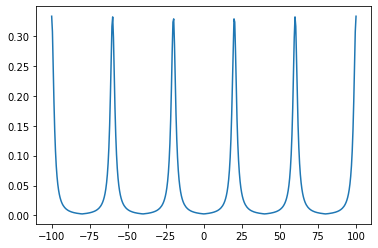

In [35]:
x = np.linspace(-100, 100, 400)
plt.plot(x, periodicPulseFunction(x, 40))
plt.show()

### Step 2: Define the Fourier Series 

This function is neither odd nor even, so we're going to have to take into account both the the even coefficients $a_k$ and the odd coefficients $b_k$.

$$ f(x) = \sum\limits_{k=0}^{\infty} a_k cos\left(\frac{2\pi k x}{T}\right) + b_k sin\left(\frac{2\pi k x}{T}\right)  $$

Complete the `fourierSeriesSum` that calculates the summation described above.  

In [36]:
def fourierSeriesSum(k, ak, bk, x, period):
    val = 0
    for i in range(k):
        val += ak[i]*np.cos(2*np.pi*i*x/period)+bk[i]*np.sin(2*np.pi*i*x/period)
    
    return val

### Step 3: Define the Integrands

Because we have both even and odd terms, we're going to have two separate integrals:

The integral to solve for the even terms:
$$ a_k = \frac{1}{T} \int\limits_{0}^{T} f(x, \text{period}) \cos\left(\frac{2\pi k x}{T} \right) dx$$



The integral to solve for the odd terms:
$$ b_k = \frac{1}{T} \int\limits_{0}^{T} f(x, \text{period}) \sin\left(\frac{2\pi k x}{T} \right) dx$$

In [37]:
def odd_integrand(x, f, k, period):
    """
    Parameters:
        x: the x values to consider
        f: the function f(x, period) used in the integral
        k: the k value to use
        period: the period of f
    """
    return f(x, period) * np.cos(2 * np.pi * k * x / period)

In [38]:
def even_integrand(x, f, k, period):
    """
    Parameters:
        x: the x values to consider
        f: the function f(x, period) used in the integral
        k: the k value to use
        period: the period of f
    """
    return f(x, period) * np.sin(2 * np.pi * k * x / period)

### Step 4: Find the Fourier Coefficients

Ok! Now it's time to find the coefficients. This is the same process as last time:
1. Initialize an $a_k$ and $b_k$ array
2. Loop through all the $k$ values
3. Find $a_k[i]$ and $b_k[i]$ where i $\in [0, k]$
4. Return $a_k$ and $b_k$

(At the end of your quad function, add "limit = 100" as an argument)

In [39]:
def findFourierCoefficients(f, k, period):
    ak = []
    bk = []
    for i in range(k):
        ak.append((1 / period) * quad(odd_integrand, 0, period, args = (f, i, period,) , limit = 100 )[0])
        bk.append((1 / period)* quad(even_integrand, 0, period, args = (f,i,period,), limit = 100 )[0])
    return ak,bk

### Step 5: Putting it all Together

Let's test it out! 

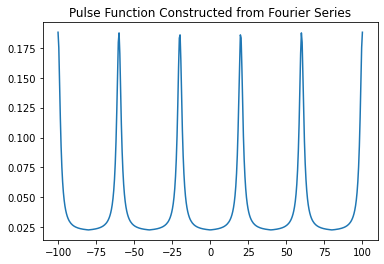

In [40]:
[ak, bk] = findFourierCoefficients(periodicPulseFunction, 100, 40)
y = fourierSeriesSum(100, ak, bk, x, 40)
plt.plot(x, y)
plt.title("Pulse Function Constructed from Fourier Series")
plt.show()

### Step 6: Analyzing the Signal

Let's visualize what the coeffcients look like.

Plot the even coefficients ($a_k$ versus $k$).

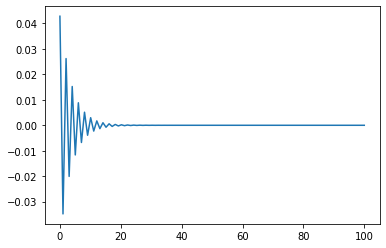

In [41]:
kx = np.linspace(0,100,100)
plt.plot(kx,ak)

Plot the odd coefficients ($b_k$ versus $k$).

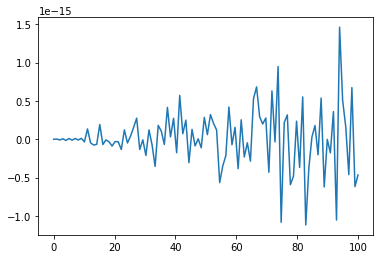

In [42]:
plt.plot(kx,bk)

## Part 2: Application

### Option 1

Below I've imported and plotted a signal for you. Break down this signal into sines and cosines, and plot the coefficients ($a_k$ versus $k$ and $b_k$ versus $k$)

In [43]:
x, y = np.loadtxt("signal.txt", unpack=True)

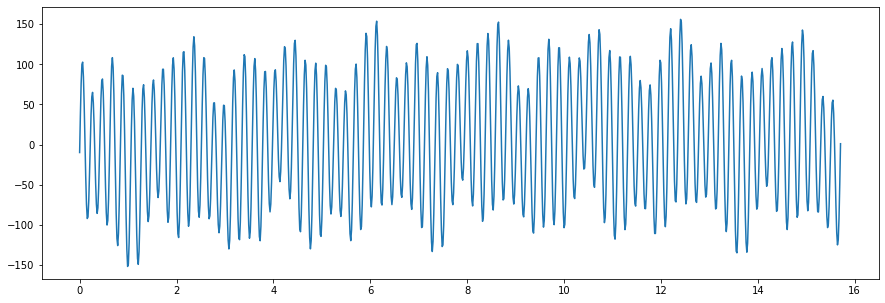

In [44]:
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.show()

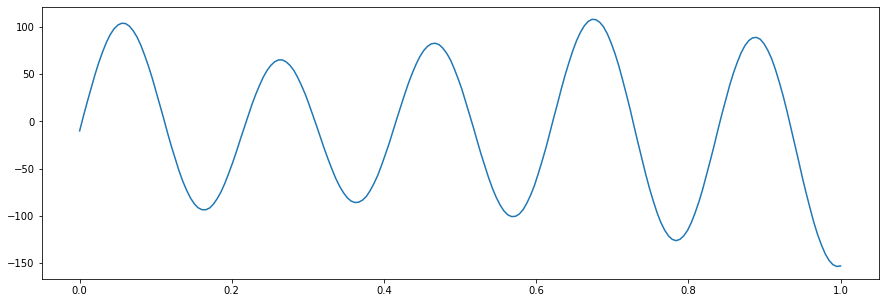

In [45]:
def noise(x_value, period):
    x_value = x_value % period
    first = 0
    last = len(x)
    while abs(first - last) > 1:
        mid = math.floor((first + last) / 2)            
        if x_value > x[mid]:
            first = mid
        elif x_value == x[mid]:
            return y[mid]
        elif x_value < x[mid]:
            last = mid
    a = first
    b = last
    c = math.floor((last + 1) % len(x))
    return (x_value - x[b]) * (x_value - x[c]) * y[a] / ((x[a] - x[b]) * (x[a] - x[c])) + (x_value - x[a]) * (x_value - x[c]) * y[b] / ((x[b] - x[a]) * (x[b] - x[c])) + (x_value - x[a]) * (x_value - x[b]) * y[c] / ((x[c] - x[a]) * (x[c] - x[b]))

period = x[-1]
x_n = np.linspace(0, 1, 200)
y_n = []
for i in x_n:
    y_n.append(noise(i, period))
plt.figure(figsize=(15, 5))
plt.plot(x_n, y_n)
plt.show()

### Option 2

Find a signal from real data, and find the cosines and sines values that comprise that signal. 